# Custom Dataset 만들기

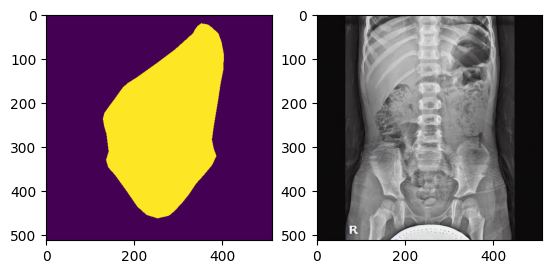

In [1]:
from torch.utils.data import Dataset, DataLoader
import joblib
import numpy as np
import cv2
from PIL import Image
import os
from torch import tensor
from torchvision import transforms
import matplotlib.pyplot as plt

class CustomDataset(Dataset):
    def __init__(self,dataframe,image_path):
        self.data = joblib.load(dataframe)
        self.image_path = image_path
        self.W = 512
        self.H = 512
        
    def __len__(self):
        return self.data.shape[0]
    
    def __getitem__(self, index):
        row = self.data.iloc[index]
        image_path = os.path.join(self.image_path, row['ImagePath'], row['Filename'])
        image = Image.open(image_path)
        transform = transforms.ToTensor()
        image_tensor = transform(image)
        
        if row['Point'] is None or row['Point'] == 'None':
            mask = np.zeros((self.H,self.W),dtype=np.uint8)
        else:
            points = row['Point']  # 문자열이라면 파싱
            pts = np.array(points, dtype=np.int32).reshape((-1, 1, 2))
            mask = np.zeros((self.H, self.W), dtype=np.uint8)
            cv2.fillPoly(mask, [pts], color=int(row['Class']))
        return image_tensor, mask, int(row['Class'])

Train_CustomDataset = CustomDataset('Train_Data.pkl','../Data/Training/01.원천데이터')
image_tensor, mask, classidx = Train_CustomDataset[5000]

plt.subplot(1,2,1)
plt.imshow(mask)
plt.subplot(1,2,2)
plt.imshow(image_tensor.permute(1,2,0))
plt.show()

In [2]:
joblib.load('Train_Data.pkl')

,Filename,ImagePath,Class,Point,Caption
0,1_0003.png,TS_1.질환_1.선천성유문협착증,1,"[[371, 16], [344, 29], [316, 43], [298, 55], [...",This plain abdominal radiograph of an about 1-...
1,1_0004.png,TS_1.질환_1.선천성유문협착증,1,"[[388, 139], [371, 139], [356, 145], [338, 153...",This plain abdominal radiograph reveals marked...
2,1_0007.png,TS_1.질환_1.선천성유문협착증,1,"[[335, 161], [326, 160], [315, 158], [310, 159...",A plain abdominal radiograph of an about 1-mon...
3,1_0008.png,TS_1.질환_1.선천성유문협착증,1,"[[392, 87], [383, 92], [360, 102], [345, 107],...",This plain abdominal radiograph reveals modera...
4,1_0012.png,TS_1.질환_1.선천성유문협착증,1,"[[387, 33], [366, 38], [347, 46], [329, 54], [...",This plain abdominal radiograph of an about 1-...
...,...,...,...,...,...
7995,5_1755.png,TS_2.정상,5,None,This plain abdominal radiograph shows an unrem...
7996,5_1756.png,TS_2.정상,5,None,This plain abdominal radiograph shows an unrem...
7997,5_1757.png,TS_2.정상,5,None,This plain abdominal radiograph shows a nonspe...
7998,5_1758.png,TS_2.정상,5,None,A plain abdominal radiograph with an unremarka...
